<a href="https://colab.research.google.com/github/yazim1/Data-Science-and-Analytics-final-year-project/blob/main/RFRModelFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#This notebook contains the python code for The Random Forest regressor model to predict the price of Gold

#Firstly importing the libraries required for the model, after being pip installed in the command prompt

In [23]:
#Importing all the neccessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import yfinance as yf
import matplotlib.pyplot as plt


#Importing the dataset from yahoo finance directly

In [24]:
#Importing the dataset from yahoo finance with stock ticker symbol 'GC=F' between the dates 1st jan 2012 and 3rd jan 2021 (9 years).
#Saving the dataset in a variable called 'df'.
df = yf.download('GC=F', start='2012-01-01', end='2021-01-04')


[*********************100%%**********************]  1 of 1 completed


#Data pre-proccessing and preparation

---
#Creating the dataframes

In [25]:
#Now creating the target feature ('Close price') where we shift by 1 day backwards, this allows to predcit the next days price.
df['Target'] = df['Close'].shift(-1)

#Now dropping the last row as it will have an null value for the target as we have shifted it.
df = df[:-1]


In [26]:
#Saving the feautures from the original dataset into a variable called so we can use for the RFR model.
features = ['Open', 'High', 'Low','Volume','Adj Close']
#Creating a dataframe containing the features and savin in a avariable called 'x'.
X = df[features]
#saving the 'target dataframe in a variable called 'y'.
y = df['Target']

#Splitting data into train and test sets

In [27]:
#Now splitting the data into training and testing sets.
#Now to create an 80/20 split for the dataset, the first 80% will be used for training  and the other 20% will be used for testing.
split_index = int(len(df) * 0.8)
#Now saving the split data into x and y train and test sets in there own variables.
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]



#Creating the RFR model

In [28]:
#Now initializing the Random Forest Regressor.
#'n_estimators' is the number of trees and can be tuned.
model = RandomForestRegressor(n_estimators=448, max_depth =48, min_samples_split=5, random_state=42)

#now training/fitting the model using the x and y training sets we created earlier
model.fit(X_train, y_train)


RandomForestRegressor(max_depth=48, min_samples_split=5, n_estimators=448,
                      random_state=42)

#Making predictions

In [29]:
#Now making predictions
predictions = model.predict(X_test)

#printing out the prediction for 4th January 2021
print("Predicted Close Price for 4th January 2021:", predictions[-1])


#reseting y_test's index for alignment
y_test = y_test.reset_index(drop=True)

#Now creating a DataFrame with both the original and the predicted values to compare and plot.
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print(comparison_df)



Predicted Close Price for 4th January 2021: 1754.8615736899244
          Actual    Predicted
0    1305.000000  1300.690861
1    1300.500000  1298.419747
2    1306.099976  1301.920235
3    1311.599976  1300.016998
4    1321.900024  1314.478516
..           ...          ...
448  1879.900024  1753.484000
449  1877.199951  1750.487785
450  1879.699951  1753.234507
451  1891.000000  1754.861574
452  1893.099976  1754.861574

[453 rows x 2 columns]


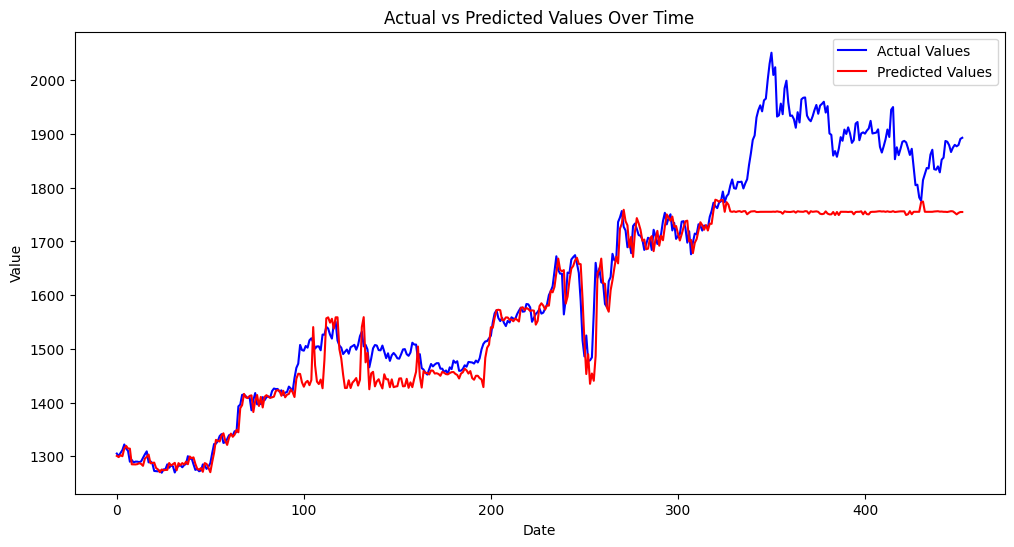

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', color='blue')
plt.plot(predictions, label='Predicted Values', color='red')
plt.title('Actual vs Predicted Values Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

#evaluating the model

In [31]:
r_squared = r2_score(y_test, predictions)
print(f"R-squared: {r_squared}")
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error (MAE): {mae}")
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


R-squared: 0.8451981558758216
Mean Absolute Error (MAE): 55.037461376066695
Mean Squared Error (MSE): 7086.526180531041
Root Mean Squared Error (RMSE): 84.18150735482848


In [21]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

#defining the parameter distribution
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(10, 50),
    'min_samples_split': randint(2, 11)
}

#initialising the model
rfr = RandomForestRegressor()

#initialising the random search model
random_search = RandomizedSearchCV(estimator=rfr, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)

#fitting the random search to the data
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ae8fbf16710>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ae8f9d3f580>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ae8f9d3f100>},
                   random_state=42, scoring='neg_mean_squared_error')

In [22]:
best_params = random_search.best_params_
print("Best hyperparameters:", best_params)

Best hyperparameters: {'max_depth': 11, 'min_samples_split': 6, 'n_estimators': 260}
